In [ ]:
pip install pandas odfpy

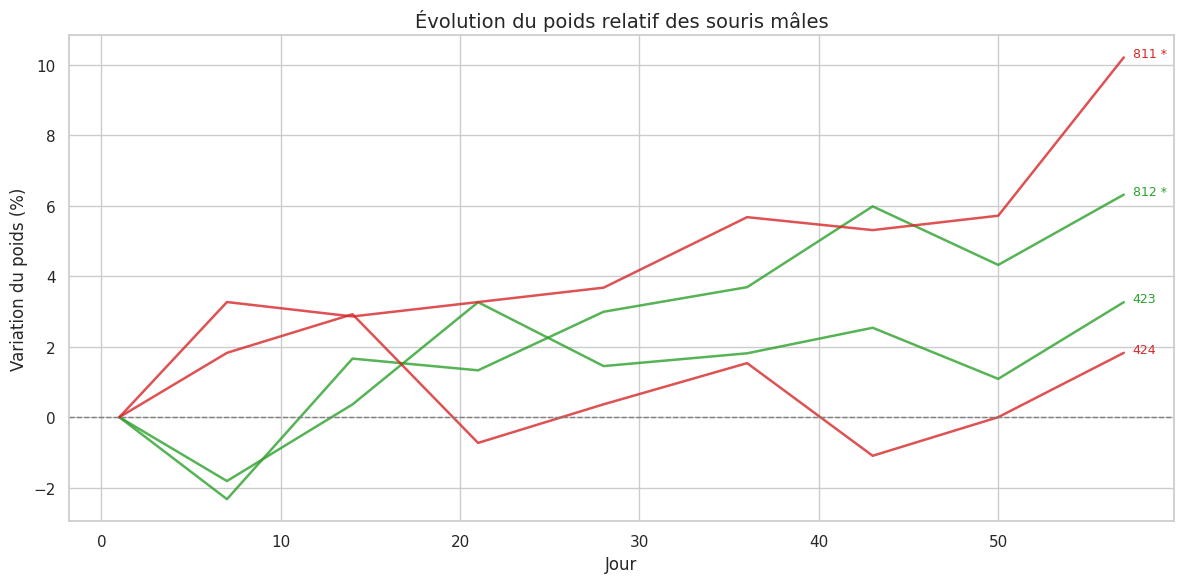

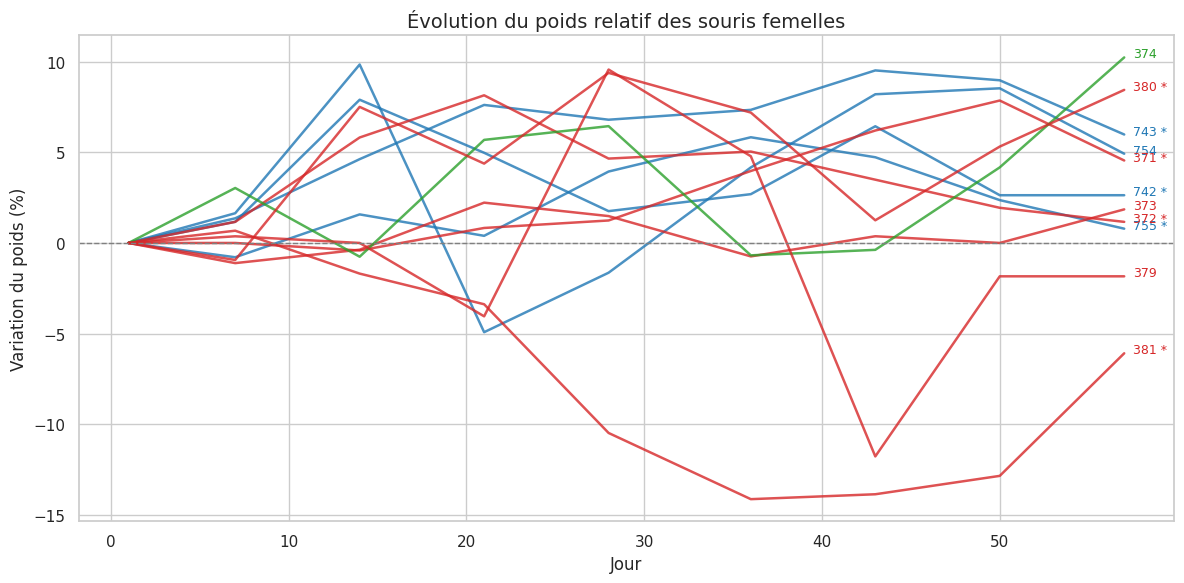

In [ ]:
from scipy.stats import wilcoxon

def tracer_par_sexe_avec_stats(sexe_cible):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    sous_df = df[df["sexe"] == sexe_cible]

    for souris_id in sous_df["souris_id"].unique():
        sub_data = sous_df[sous_df["souris_id"] == souris_id]
        génotype = sub_data["génotype"].iloc[0]
        couleur = palette.get(génotype, "gray")

        # Courbe
        plt.plot(sub_data["jour"], sub_data["poids_relatif"],
                 label=f"{souris_id} ({génotype})",
                 color=couleur, alpha=0.8, linewidth=1.8)

        # Test statistique : poids final vs initial
        poids_diff = sub_data["poids_relatif"].values
        jours = sub_data["jour"].values

        # Pour être plus rigoureux : au moins 2 points
        if len(poids_diff) >= 2:
            try:
                stat, p_value = wilcoxon(poids_diff)
            except:
                p_value = 1  # en cas d'erreur (ex. tous les poids identiques)

            # Si significatif, on ajoute une étoile
            dernier_jour = jours.max()
            dernier_point = sub_data[sub_data["jour"] == dernier_jour]["poids_relatif"].values[0]
            label = str(souris_id)

            if p_value < 0.05:
                label += " *"
            elif p_value < 0.01:
                label += " **"

            plt.text(dernier_jour + 0.5, dernier_point, label,
                     fontsize=9, color=couleur)

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"Évolution du poids relatif des souris {sexe_cible}s", fontsize=14)
    plt.xlabel("Jour", fontsize=12)
    plt.ylabel("Variation du poids (%)", fontsize=12)
    plt.tight_layout()
    plt.show()

# Appel avec statistiques
tracer_par_sexe_avec_stats("mâle")
tracer_par_sexe_avec_stats("femelle")
